In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import random, warnings
warnings.filterwarnings("ignore")

**Generating a Normal Distribution (DISCRETE VALUES )** <br />
**Calculate the probability of the distribution (DISCRETE VALUES )**
-  [1,2,3,4,5] => sum => 15
-  probs  = 1/15 , 2/15 , 3/15...soon

In [46]:
SIZE_N =  1000
data =  []
for i in range(SIZE_N):
  a  = random.randint(1,10)
  b =  random.randint(1,10)
  data.append(a+b)   # Min value :2  Max VALUE :20

data_count = pd.Series(data).value_counts()
probs  =  (data_count / data_count.sum()).sort_index()  # Calculating probs and then sorting it
print("probs of Data ")
print(probs.head())
print()
print("Cumulative probs of Data ")
probs_cdf =  np.cumsum(probs)  # Calculating Cumulative probs  of the data
print(probs_cdf.head())

probs of Data 
2    0.008
3    0.021
4    0.029
5    0.059
6    0.049
Name: count, dtype: float64

Cumulative probs of Data 
2    0.008
3    0.029
4    0.058
5    0.117
6    0.166
Name: count, dtype: float64


**Plotting PDF and CDF  of the distribution**
- In pdf y axis = probs  (DISCRETE VALUES )
- In cdf y axis  = probs only   (DISCRETE VALUES )

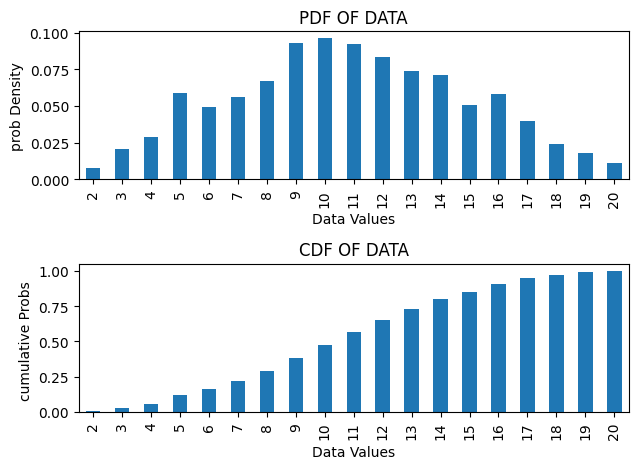

In [47]:
fig, axes =  plt.subplots(2)

## PDF PLOTTTING
probs.plot(kind="bar",ax=axes[0]) ## PDF OF THE DATA
axes[0].set_title("PDF OF DATA")
axes[0].set_xlabel("Data Values")
axes[0].set_ylabel("prob Density")

probs_cdf.plot(kind="bar",ax=axes[1])  ## CDF OF THE DATA
axes[1].set_title("CDF OF DATA")
axes[1].set_xlabel("Data Values")
axes[1].set_ylabel("cumulative Probs ")
fig.tight_layout()

**Generating a random variable (CONTINOUS VALUES)**
-  we intentionally creates a normal dist =  data_c
-  created a dist with data_c **mean** and **sigma**
- again generated random values in range of data_c **min** ,**max** values
-  with the dist calculate the pdf of the random values

** This is also a parametric density estimation as we are trying to guess the dist of the data

Q1)  if we already have data then why we have to generate random values again in that range ? <br />
Ans  

*   these random value are for curve part in range of min,max of data else the prob of data is not curve it will be inisde the data

* In short -  if prob of data is calculated then the prob of whole region is calculated
*   But we want prob of just 100 values in that range   to build the curve part

In [100]:
mean =  0
sigma  = 1
SIZE_N =   1000
data_c =  np.random.normal(loc=mean,scale=sigma,size=SIZE_N)  # Intentionally created a normal dist , and take their mean , sigma, min , max values
data_c =  pd.Series(data_c)
data_c.value_counts().head(3)#every continous value is occuring one time

,count
-0.803750,1
0.216622,1
0.369646,1


In [105]:
dist =  sc.stats.norm(data_c.mean(),data_c.std()) ## Created A dist with the help of sigma , mean
values = np.linspace(data_c.min(),data_c.max(),100)  # again created random value in range of data Min, Max for plotting  a curve structure
values[:3]

array([-3.45354833, -3.39055365, -3.32755897])

In [102]:
probs_densities =  [dist.pdf(x)  for x in values]  # calculate pdf by putting x value, sigma and mean in pdf equation
probs_densities[:3]

[np.float64(0.0006931080439326906),
 np.float64(0.000872898965757847),
 np.float64(0.001094676038166229)]

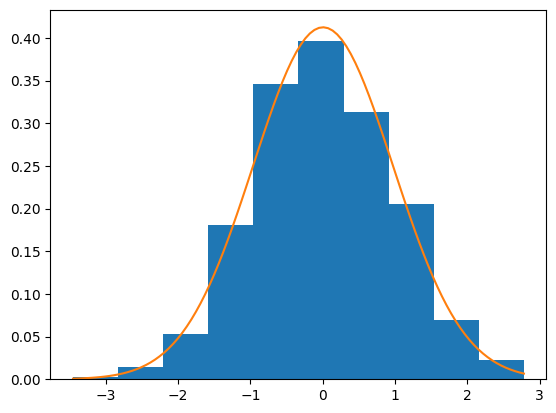

In [103]:
plt.hist(data_c,density=True)
plt.plot(values,probs_densities)

<Axes: ylabel='Density'>

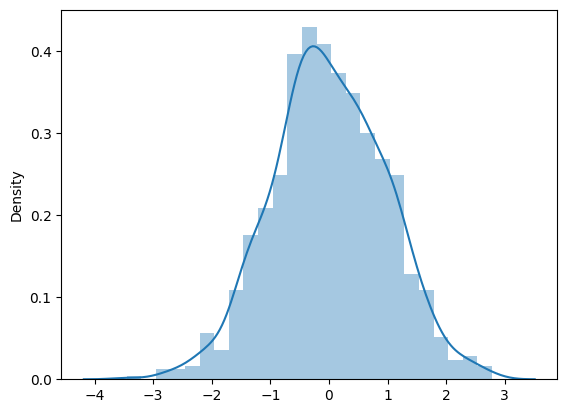

In [104]:
sns.distplot(data_c)